<a href="https://colab.research.google.com/github/HongYeongPyo/first-repository/blob/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/5%EB%A8%B8%EC%8B%A0_4%EB%B6%84%EB%A5%98%EC%8B%A4%EC%8A%B5text_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C250513.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/machine')

Drive already mounted at /content/machine; to attempt to forcibly remount, call drive.mount("/content/machine", force_remount=True).


# 데이터 일차 가공 및 모델 학습/예측 평가

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
card_df = pd.read_csv('/content/machine/MyDrive/content/machine/creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### V로 시작하는 피커들의 의미는 모른다.
- time 피처 : 데이터 생성 관련한작업용 속성 - 제거함
- amount 피처 : 신용카드 트랜잭션 금액
- class : 레이블, 0의 경우은 정상, 1의 경우는 사기 트랜잭션
- 전체 레코드 수 : 284,807개. 결측치는 없다.
- Class 레이블만 int형, 나머지 피쳐는 floar형



### 데이터 사전 가공 수행과 예측 성능 비교
- 인자로 입력된 DataFrame 복사한 후,
- 가공하여 get_preprocessed_df() 함수와,
- 데이터 가공 후 학습/테스트 데이터 세트를 반환하는get_train_test_df() 함수 생성


In [5]:
### 1. get_preprocessed_df()함수에서 불필요한 Time 픽처만 삭제

from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼먼 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1,inplace=True)
  return df_copy


### get—train—test_dataset( ):
- ge_preprocessed—elf( )를 호출한 뒤 학습 피치/레이불 데이터 세트,테스트 피처/레이블 데이터 세트를 반환합니다.

### get_train_test_dataset()
-  내부에서 train—test_split( ) 합수를 호출하며,
- 테스트 데이터 세트를 전체의 30%인 Stratified 방식으로 추출해
- 학습 데이터 세트와 데스트 데이터 세트의 레이블 값 분포도를 서로 동일하게 만듭니다.


In [6]:
from re import X
def get_train_test_dataset(df=None ):       # 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
    df_copy = get_preprocessed_df(df)       # 인자로 입력된 Da aFrame 의 사전 데이터 가공이 완료된 복사 Dat aFrame 반환
    X_features = df_copy. iloc[: , :-1]     # DataFrame 의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    y_target = df_copy. iloc[: , -1]

# train_test_split( ）으로 학습과 테스트 데이터 분할. stratify=y_traget으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

    return X_train, X_test, y_train, y_test   # 학습과 테스트 데이터 세트 반환

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)


- 생성한 학습 데이터 세트와 테스트 세트의 레이블 값 비율을 백분율로 환산
- 서로 비슷하게 분활되었는지 확인

In [7]:
print('학습 데이터 레이블 값 비율ㅇ')
print(y_train.value_counts()/y_train.shape[0]*100)

print('테스트 데이너 레이블 값 비율')
print(y_test.value_counts() / y_test.shape[0]*100)

학습 데이터 레이블 값 비율ㅇ
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이너 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


- 학습 데이터 레이블의 경우 : 1 값이 약 0.172%
- 테스트 데이터 레이블의 경우 : 1 값이 약 0.173%
- 차이 없이 잘 분할되었다.

### 데이터 가공을 수행하면서 예측 성능이 어떻게 변화하는가?
- 로지스틱 회귀 기반의 모델 : 3장에서 생성한 get_clf_eval() 함수 사용
- LightGBM 기반의 모델

In [8]:
# 1. 로지스틱 회귀를 이용한 신용카드 사기 여부 예측

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

## 3장에서 사용한 get_clf_eval() 함수 작성p.156(174)





In [9]:
# 3장에서 사용한 get_clf_aval()
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))


## 3장에서 사용한 get_clf_eval() 함수를 10장 실습에 맞게 변경
- 함수 인자 2개에서 3개. roc_auc_score 추가
- 인자 이름 변경

In [10]:
# 3장에서 사용한 get_clf_eval() 함수 변형 작성 : roc_auc_score 추가. 이름 변경
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, AUC : {3:.4f}'.format(
        accuracy, precision, recall, roc_auc))


In [11]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)


오차 행렬
[[85281    14]
 [   57    91]]
정확도 : 0.9992, 정밀도 : 0.8667, 재현율 : 0.6149, AUC : 0.9741


### 테스트 데이터 세트로 측정시:
- 재현율(recall)은 0.62149
- RCO-AUC 는 0.9741

# 2. LightGBM 을 이용한 모델

- 수행 예제 코드에서 반복적으로 모델을 변경해 학습/예측/평가-> - 별도 함수 생성
- get_model_train_eval() 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 셑를 입력 받아서 학습/예측/평가를 수행하는 함수

### 인자
- 사이킷런의 Estimator 객체
- 데이터 세트를 입력 받아서 학습/예측/평사 수행

In [12]:
# 인자 : 사이킷런의 Estimator 객체.  학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)

    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

### 데이터 세트 : 극도로 불균형한 레이블 값 분포도
- LGBMClassifier 객체 생성시,
- boost_from_average=False 로 파라미터 설정

### _LightGBM 버전업 되면서 변경 사항
- boot_from_average 파라미터의 디폴드 값이 False -> True


### 본 예제와 같이 극도로 불균형한 분포를 이루는 경우
- boost_from_average = True 설정은,
- 재현율 및 ROC-AUC 성능을 매우 크게 저하시킨다.

### LightGBM 2,1,0 이상의 버젼이 설치되어 있거나, 불균형한 데이터 세트에서 예측 성능이 매우 저조할 경우
- LGBMClassifier 객체 생성시 boost_from_average = False 로 파라미터 설정
- 질의와 답변 사이트 : https://github.com/Microsoft/LightGBM/issues/1487

# LightGBM 으로 모델 학습한 뒤, 별도의 테스트 데이터 세트에서 예측 평가 수행

In [13]:
# LightGMB 모델 학습. 별도의 테스트 세트에서 예측 평가 (교재 코딩 p.284)
import warnings
warnings.filterwarnings('ignore')  # Python 경고 메시지 억제



from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=1000,
    num_leaves=64,
    n_jobs=-1,
    boost_from_average=False,
    verbosity=-1)               # 핵심 옵션: warning 포함 모든 로그 억제

get_model_train_eval(
    lgbm_clf,
    ftr_train = X_train,
    ftr_test = X_test,

    tgt_train = y_train,
    tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9573, 재현율 : 0.7568, AUC : 0.9790


# 앞의 로지스틱 회귀 보다 높은 수치
- 재현율 0.7568
- ROC-AUC 0.979

# 데이터 분포도 변환 후 모델 학습/예측/평가

### 왜곡된 분포도를 가지는 데이터를 재가공한 뒤에 모델을 다시 테스트
- creditcard.csv 의 중요 피처 값의 분포도를 살펴본다.
- 로지스틱 회귀는 선형 모델 : 5장에서 다시 설명
- 대부분 선형 모델은 중요 피처들의 값이 정규 분포 형태 유지하는 것을 선호

- Amount 피처 : 신용카드 사용 금액으로 정상/사기 트랜잭션을 결정하는데 매우 유용한 속성일 가능성이 높다.

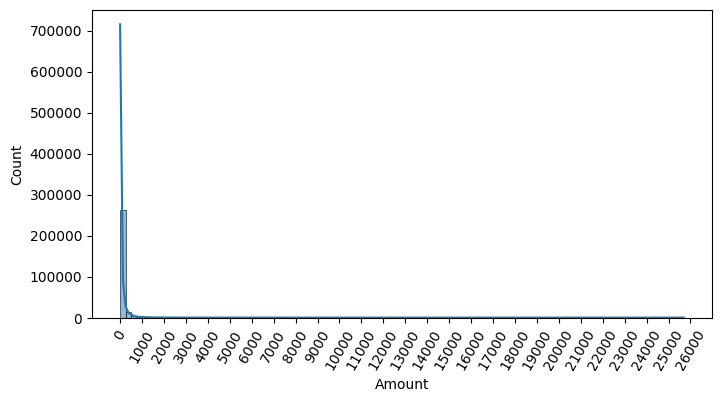

In [14]:
# Amount 피처의 분포도 학인

import seaborn as sns

plt.figure(figsize = (8, 4))
plt.xticks(range(0, 30000, 1000), rotation = 60)
sns.histplot(card_df['Amount'], bins = 100, kde = True)

plt.show()


- Amount, 즉 카드 사용금액이 1,000불 이하인 데이터가 대부분
- 26,000불까지 드물지만 많은 금액을 사용한 경우가 발생 - 꼬리가 긴 형태의 분포 곡성


###  Amount를 표준정규 분포 형태로 변환한 뒤에 로지스택 회귀의 예측 성능을 측정
- get_processed_df() 함수를 다음과 간이 사이킷런의 StandardScaler 클래스를 이용
- Amount 피처를 정규 분포 형태로 변환

In [15]:
# 사이킷런의 StandardScasler를 이용해 정규 분포 형태로 Amount 피처 값 변환하는 로직으로 수정
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()

    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))  # ✅ 수정됨

    df_copy.insert(0, 'Amount_Scaled', amount_n)             #변환된 Amoun_Scaled로 피처명 변환후, DataFrame 맨 앞 컬럼으로 입력
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)   # 기존 Time, AMount 피처 삭제

    return df_copy


# 로지스틱 회귀와 LIghtGBM 모델을 각각 학습/예축/평가
- 함수 수정한 후,
- get_train_test_dataset를 호출하여,
- 학습/테스트 데이터 세트를 생성한 후
- get_model_train_eval()를 이용해 평가

In [16]:
# Amount를 정규분포 형태로 변환 후, 로지스텍 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter= 1000)
get_model_train_eval(
    lr_clf,
    ftr_train = X_train,
    ftr_test = X_test,
    tgt_train = y_train,
    tgt_test = y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(
    n_estimators = 1000,
    num_leaves = 64,
    n_jobs = -1,
    boost_from_average = False)

get_model_train_eval(
    lgbm_clf,
    ftr_train = X_train,
    ftr_test = X_test,
    tgt_train = y_train,
    tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   55    93]]
정확도 : 0.9992, 정밀도 : 0.8692, 재현율 : 0.6284, AUC : 0.9706
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도 : 0.9995, 정밀도 : 0.9569, 재현율 : 0.7500, AUC : 0.9779


### 정규분포 형태로 AMount 피처 값을 변환 한 후, 데이터 세트에 적용한 로지스틱 회귀 경우
- 정밀도와 재현율이 오히려 조금식 저하되었고,

### LightGBM의 경우
- 약간 정밀도와 재현율이 저하되었지만 성능상으로는 큰 변경이 없다

# < 로그 변환 수행 >

- 데이터 분포도가 심하게 왜곡되어 있을 경우 적용하는 중요 기법 중이 하나이며,
- 원래 값을 log 갑으로 변환하여 원래 큰 값을 상대적으로 작은 값으로 변환하여,
- 데이터 분포도의 왜곡을 상당 수준 개선해 준다

- 로그 변환은 넘파이의 log1p() 함수 이용하여 간단히 변환 가능
- 데이터 가공 함수인 get_preprocessed_df()를 다음과 같이 로그 변환 로직으로 변경한다.

In [17]:
def get_preprocessed_df(df=None):
    df_copy= df.copy()
    amount_n = np.log1p(df_copy['Amount'])            # 넘파이의 loglp()를 이용해 Amount를 로그 변환

    df_copy.insert(0,'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)
    return df_copy


## Amount 피처를 로그 변환 후, 다시 로지스틱 회귀와 LightGBM 모델을 적용 한 후  예측 성능 확인

In [18]:
# Amount 피처를 로그 변환 후, 다시 로지스틱 회귀와 LightGBM 모델을 적용 한 후  예측 성능 확인
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(
    lr_clf,
    ftr_train = X_train,
    ftr_test = X_test,
    tgt_train = y_train,
    tgt_test = y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(
    lgbm_clf,
    ftr_train = X_train,
    ftr_test = X_test,
    tgt_train = y_train,
    tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85282    13]
 [   59    89]]
정확도 : 0.9992, 정밀도 : 0.8725, 재현율 : 0.6014, AUC : 0.9734
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도 : 0.9995, 정밀도 : 0.9576, 재현율 : 0.7635, AUC : 0.9796


- 로지스틱 회귀의 경우 : 원본 데이터 대비 정밀도는 향상 되었지만, 재현율은 저하
- 레이블이 극도로 불균일한 데이터 세트에서의 로지스틱 회귀는 데이터 변환 시 약간은 불안정한 성능 결과를 보여 주고 있다.
- LoghtGBM 경우: 재현율 향상





# 이상치 데이터 제거 후 모델 학습/예측/평가
- IQR 이용 제거

1. 어떤 피처이 이상치 데이터를 검출할 것인지 선택 필요
 - 결정 값(즉 레이블)과가장 상관성이 높은 피처들을 위주로 이상치를 검출
 - 모든 피처들이 이상피를 검출하는 것은 시간소모가 많다
 - 결정값과 상관성이 높지 않은 피처들의 경우는 이상치를 제거하더라도 성능 향상에 크게 기여 하지 않는다.


- DataFrame() 의 corr()를 이용하여 각 픽퍼별로 상관도를 구한 뒤
- 시본의 heatmap을 통해 시각하

<Axes: >

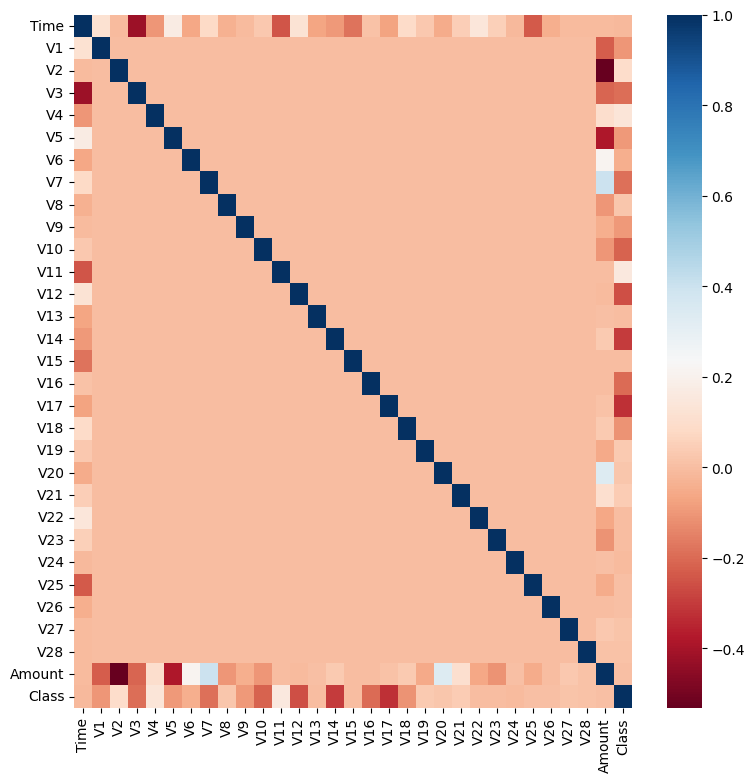

In [19]:
import seaborn as sns

plt.figure(figsize = (9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')


### 상관관계 히트맵에서
- cmap을 'RuBu'로 설정해
- 양의 상관관계가 높을수로 색깔이 진한 파란색에 가까우며,
- 음의 상관관계가 높을수록 색깔이 진한 빨간색에 가깝게 표현
- 맨 아래에 위치한 결정 레이블인 Class 파처와 음의 상관 관계가 가장 높은 피처는 V14와 V17

### V14 이상치 제거
- IQR을 이용해 이상치를 검출하는 함수 생성한 뒤, 검출된 이상치 삭제
- get_outlier() 함수 : 인자로 DataFrame과 이상치를 검출한 칼럼을 입력 받는다

### 함수 내에서 넘파이의 percentile()을 이용하여,
- 1/4분위와 3/4 분의를 구하고, 이에 기반해 IQR을 계산
- 계산된 IQR에 1.5를 곱해서 최댓값고 ㅏ최솟값 지점을 구한 뒤,
- 최댓값보다 크거나 최솟값보다 작은 값을 이상치로 설정하고,
- 해당 이상치가 있는 DataFrame Index를 반환


In [20]:
import numpy as np

def get_outlier(df= None, column= None, weight=1.5):
  fraud = df[df['Class']==1][column]                # fraud에 해당하는  column 데이터만 추출
  quantile_25 = np.percentile(fraud.values, 25)      # 1/4분위 지점을 np.percdntile로 구함
  quantile_75 = np.percentile(fraud.values, 75)      # 3/4분위 지점

  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight

  lowest_val = quantile_25 - iqr_weight           # 최솟값
  highest_val = quantile_75 + iqr_weight          # 최댓값

  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index   # 설정된 이상치를 DataFrame index반환
  return outlier_index


- get_outlier() 함수를 이용해서 V14 칼럼에서 이상치 데이터를 찾는다.


In [21]:
# V14 컬럼 이상치 찾기
outlier_index = get_outlier(df=card_df, column= 'V14', weight= 1.5)
print('이상치 데이터 인덱스', outlier_index)

이상치 데이터 인덱스 Index([8296, 8615, 9035, 9252], dtype='int64')


- 총 4개의 데이터 : 8296, 8615, 9035, 9252 의 index가 이상치로 추출


### 데이터를 가공한 후, 데이터 세트를 이용해 로지스틱 회귀와 LightGBM 모델을 다시 적용
- get_outlier() 를 이용해 이상치를 추출하고,
- 이를 삭제하는 로직을 get_processed_df() 함수에 추가하여
- 데이터를 가공한다.

In [22]:
# get_prodessed()를 로그 변환 후, V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df= None) :
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)

  #이상치 데이ㅓ 삭제하는 로직 추가
  outlier_index = get_outlier(df=df_copy, column= 'V14', weight= 1.5)
  df_copy.drop(outlier_index, axis= 0, inplace= True)
  return df_copy


In [23]:
# 로지스틱 회귀와 LightGBM 모델을 적용 한 후  예측 성능 확인
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(
    lr_clf,
    ftr_train = X_train,
    ftr_test = X_test,
    tgt_train = y_train,
    tgt_test = y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(
    lgbm_clf,
    ftr_train = X_train,
    ftr_test = X_test,
    tgt_train = y_train,
    tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   49    97]]
정확도 : 0.9993, 정밀도 : 0.8661, 재현율 : 0.6644, AUC : 0.9758
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   26   120]]
정확도 : 0.9996, 정밀도 : 0.9600, 재현율 : 0.8219, AUC : 0.9765


- 이상치 데이터를 제거한 뒤, 로지스틱 회귀와 KightGBM 모두 예측 성능이 크게 향상
- 로지스틱 회귀 경우, 재현율이 60.14%에서 66.44%로
- LightGBM 경우, 재현율이 76.35%에서 82.19%로 크게 향상

# SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
- 앞에서 설치한 imbalanced-learn 패키지의 SMOTE 클래스를 이용해 간단히 구현가능
- SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 셈플링을 해야한다.

### 검증 데이터 세트나 테스트 데이터 세트를 오버 샘플링할 경우
- 결국은 원본 데이터 세트가 아닌 데이터 세트에서 검증 또는 데스트를 수행하기 떄문에 올바른 검증/테스트가 될 수 없다.

### 데이터를 증식 전과 비교
- 앞 예제에서 생성한 학습 피처/레이블 데이터를
- SMOTE 객체의 fir_resample() 메서드를 이용하여 증식한 뒤 비교한다.

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state= 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)

print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())


SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 28) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 28) (398040,)
SMOTE 적용 후 레이블 값 분포:
 Class
0    199020
1    199020
Name: count, dtype: int64


- SMOTE 적용 전 학습 데이터 세트 : 199,362 건
- SMOTE 적용 후 학습 데이터 세트 : 398,040 건  (2배 가깝게 증식)
- SMOTE 적용 후 레이블 값이 0과 1의 분포가 동일하게 199,020 건으로 생성

### 생성된 학습 데이터 세트를 기반으로 우선 로지스틱 회귀 모델을 학습 한 뒤 성능 평가

In [25]:
# ftr_train과 tgt_train 인자 값이 SMOTE 증식된 X_train_over아 y_train_over 로 변경됨에 유의

print('### 로지스틱 회귀 예측 성능 ###')

lr_clf = LogisticRegression(max_iter= 1000)
get_model_train_eval(
    lr_clf,
    ftr_train = X_train_over,
    ftr_test = X_test,
    tgt_train = y_train_over,
    tgt_test = y_test)


### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[82887  2408]
 [   11   135]]
정확도 : 0.9717, 정밀도 : 0.0531, 재현율 : 0.9247, AUC : 0.9735


### 로지스틱 회귀 모델 : SMOTE로 오버 샘플링된 데이터로 학습할 경우
- 재현율 : 66.44%에서 92.47%로 크게 증가
- 정밀도 : 96.00%에서 5.31%로 급격하게 저하
- 재현율이 높더라도 이 정도로 저조한 정밀도로는 현실 업무네 적용할 수 없다
### 정밀도가 급격하게 저하된 이유:
- 오버 셈플링으로 인해 실제 원본 데이터의 유형보다 너무나 많은 Class= 1 데이터를 학습하면서,
- 실제 테스트 데이터 세트에서 예측을 지난치게 Class=1로 적용해 정밀도가 급격히 떨어지게 된 것

### SMOTE로 학습된 로지스틱 회귀 모델에 어떠한 문제가 발생하고 있는지 시각적으로 확인p.293(311)
- 분류 결정 임계값에 따른 정밀도와 재현율 곡선을 통해 확인
- 3장에서 사용한 precision_recall_curve_plot()  함수 이용 p.163(181)


In [26]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import precision_recall_curve
# import pandas as pd

# # 예시용 데이터 준비 (card_df는 데이터프레임)
# X = card_df.drop('Class', axis=1)
# y = card_df['Class']

# # 학습/테스트 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # 모델 학습
# lr_clf = LogisticRegression(max_iter=1000)
# lr_clf.fit(X_train, y_train)

# # 예측 확률 추출
# probas_pred = lr_clf.predict_proba(X_test)[:, 1]  # Positive 클래스 확률
# y_true = y_test                                   # 실제 정답 레이블

# # Precision-Recall Curve 계산
# precisions, recalls, thresholds = precision_recall_curve(y_true, probas_pred)


In [27]:
# # p.163(180)
# from sklearn.metrics import precision_recall_curve
# import matplotlib.pyplot as plt
# import numpy as np

# def precision_recall_curve_plot(y_test, pred_proba_c1):
#     # 정밀도, 재현율, 임계값 추출
#     precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
#     threshold_boundary = thresholds.shape[0]

#     # 그래프 설정
#     plt.figure(figsize=(8, 6))
#     plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='precision')  # 점선
#     #plt.plot(thresholds, precisions[0: threshold_boundary], linedstyle= '--', label= 'precision')

#     plt.plot(thresholds, recalls[:threshold_boundary], label='recall')  # 실선

#     # x축 눈금 설정
#     start, end = plt.xlim()
#     plt.xticks(np.round(np.arange(start, end, 0.1), 2))

#     # 라벨, 범례, 그리드 설정
#     plt.xlabel('Threshold value')
#     plt.ylabel('Precision and Recall value')
#     plt.legend()
#     plt.grid()
#     plt.show()

# # 함수 호출 예시
# precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])


# p.164(183) precision_recall_curve_plot
- 정밀도는 점선, 재현율은 실선
- 임곗값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고, 정밀도 값이 극도로 낮아진다.
- 임곗값을 계속 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아지는 반대의 양상


### p.293(311)  
- 분류 결정 임곗값에 따른 정밀도와 재현율 곡선을 통해,
- SMOTE로 학습된 로지스틱 회귀 모델에 어떠한 문제가 발생하고 있는지 시각적으로 확인

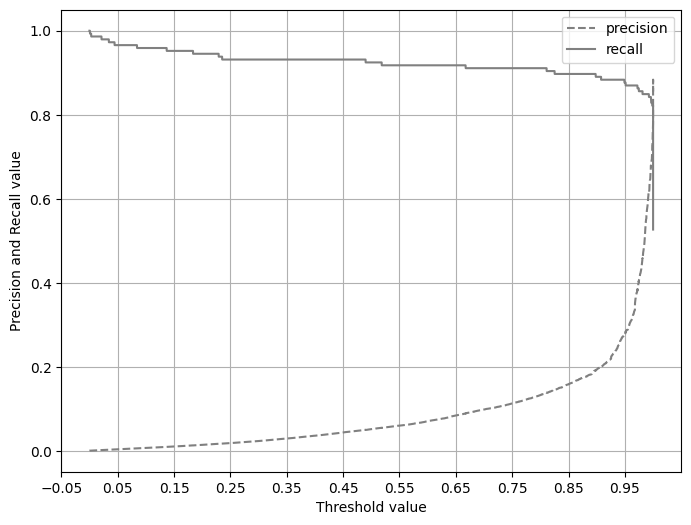

In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # 정밀도, 재현율, 임계값 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    threshold_boundary = thresholds.shape[0]

    # 흑백 스타일 설정
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', color='gray', label='precision')  # 점선 회색
    plt.plot(thresholds, recalls[:threshold_boundary], linestyle='-', color='gray', label='recall')          # 실선 회색

    # x축 눈금 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    # 라벨, 범례, 그리드
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend(loc='best')   # 범례 위치 자동
    plt.grid()
    plt.show()

# 사용 예시
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])


In [29]:
lgbm_clf =LGBMClassifier(
    n_estimators= 1000
)